## Sales
- 데이터 중 품목을 정하여
- 전처리 진행 후
- 간단한 품목 예측 머신러닝
- 전처리 공부에 중점

#### 데이터 불러오기 및 구조 확인

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/sales_data.csv', encoding = 'latin_1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 결측치 제거

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset = ['Description'])

In [7]:
# 개수가 너무 많고 나머지 데이터들이 괜찮아 보여서 그냥 가져가기로 결정! 대신에 0으로 채워주기 <- 지금은 없는 값임!
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [8]:
df.CustomerID = df.CustomerID.fillna(0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31100\1608483164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CustomerID = df.CustomerID.fillna(0)


In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.851471
std,218.007598,96.889628,6760.792031
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12367.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


#### 데이터 전처리
1. 이상치 제거

In [12]:
def outlier_iqr(data, column):
    global lower, upper
    q1, q3 = np.quantile(data[column], 0.25) , np.quantile(data[column], 0.75)
    iqr = q3 - q1
    cutoff = iqr*1.5
    lower, upper = q1 - cutoff, q3 + cutoff
    print(column, '의 사분위수와 이상치 개수는 다음과 같다')
    print('IQR은', iqr, '이다.')
    print('lower 기준값은', lower, '이다.')
    print('upper 기준값은', upper, '이다.')
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    return print('총 이상값 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [13]:
numeric_list = ['Quantity', 'UnitPrice', 'CustomerID']

In [14]:
for idx in numeric_list:
    outlier_iqr(df, idx)
    print('---------------------------------')

Quantity 의 사분위수와 이상치 개수는 다음과 같다
IQR은 9.0 이다.
lower 기준값은 -12.5 이다.
upper 기준값은 23.5 이다.
총 이상값 개수는 57967 이다.
---------------------------------
UnitPrice 의 사분위수와 이상치 개수는 다음과 같다
IQR은 2.88 이다.
lower 기준값은 -3.0700000000000003 이다.
upper 기준값은 8.45 이다.
총 이상값 개수는 39627 이다.
---------------------------------
CustomerID 의 사분위수와 이상치 개수는 다음과 같다
IQR은 3894.0 이다.
lower 기준값은 6526.0 이다.
upper 기준값은 22102.0 이다.
총 이상값 개수는 133626 이다.
---------------------------------


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Quantity 의 사분위수와 이상치 개수는 다음과 같다
IQR은 9.0 이다.
lower 기준값은 -12.5 이다.
upper 기준값은 23.5 이다.
총 이상값 개수는 57967 이다.


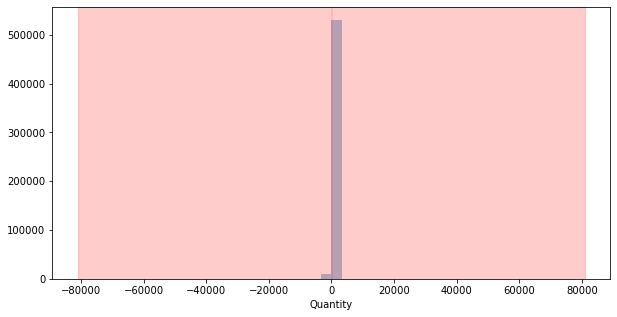

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# 이상치 시각화 해보기!
plt.figure(figsize = (10,5))
sns.distplot(df.Quantity, bins = 50, kde = False)

# 이상치 영역 박스 그리기
outlier_iqr(df, 'Quantity')
plt.axvspan(xmin = lower, xmax = df.Quantity.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = df.Quantity.max(), alpha = 0.2, color = 'red')
plt.show()

In [16]:
Qrm_idx = list(df[df.Quantity < 0].index)
Prm_idx = list(df[df['UnitPrice'] < 0].index)

In [17]:
# 주문량과 단가가 음수인 행들을 삭제함
for idx in Prm_idx:
    if idx in Qrm_idx:
        Prm_idx.remove(idx)
df = df.drop(Qrm_idx, axis = 0)
df = df.drop(Prm_idx, axis = 0)
df.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
530686,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
530687,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
530688,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
530689,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [18]:
# Quantity와 UnitPrice의 이상치 인덱스 만들기
outlier_iqr(df, 'Quantity')
upper_q = float(upper)
outlier_iqr(df, 'UnitPrice')
upper_p = float(upper)
rm_idx = df[(df["Quantity"] >= upper_q) | (df["UnitPrice"] >= upper_p)].index

Quantity 의 사분위수와 이상치 개수는 다음과 같다
IQR은 9.0 이다.
lower 기준값은 -12.5 이다.
upper 기준값은 23.5 이다.
총 이상값 개수는 56473 이다.
UnitPrice 의 사분위수와 이상치 개수는 다음과 같다
IQR은 2.88 이다.
lower 기준값은 -3.0700000000000003 이다.
upper 기준값은 8.45 이다.
총 이상값 개수는 37999 이다.


In [19]:
# Quantity와 UnitPrice 이상치 제거
df = df.drop(rm_idx, axis = 0)

Quantity 의 사분위수와 이상치 개수는 다음과 같다
IQR은 7.0 이다.
lower 기준값은 -9.5 이다.
upper 기준값은 18.5 이다.
총 이상값 개수는 5621 이다.


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


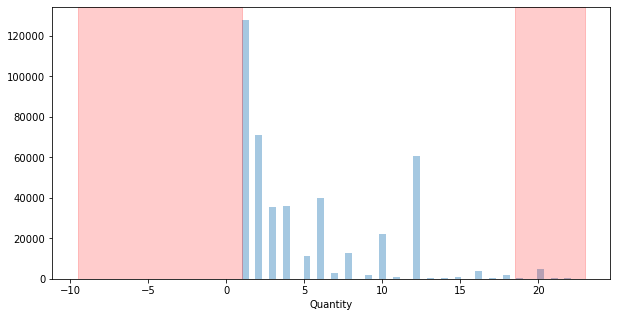

In [20]:
# 이상치 시각화 해보기!
plt.figure(figsize = (10,5))
sns.distplot(df.Quantity, bins = 50, kde = False)

# 이상치 영역 박스 그리기
outlier_iqr(df, 'Quantity')
plt.axvspan(xmin = lower, xmax = df.Quantity.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = df.Quantity.max(), alpha = 0.2, color = 'red')
plt.show()

UnitPrice 의 사분위수와 이상치 개수는 다음과 같다
IQR은 2.5 이다.
lower 기준값은 -2.5 이다.
upper 기준값은 7.5 이다.
총 이상값 개수는 17051 이다.


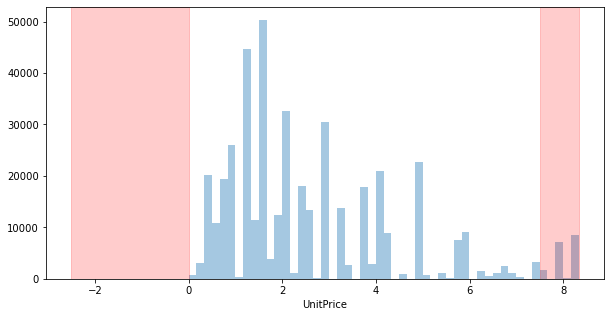

In [21]:
# 이상치 시각화 해보기!
plt.figure(figsize = (10,5))
sns.distplot(df.UnitPrice, bins = 50, kde = False)

# 이상치 영역 박스 그리기
outlier_iqr(df, 'UnitPrice')
plt.axvspan(xmin = lower, xmax = df.UnitPrice.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = upper, xmax = df.UnitPrice.max(), alpha = 0.2, color = 'red')
plt.show()

2. InvoiceDate 시계열데이터 전환 및 연, 월, 일, 시간 추출

In [22]:
import datetime as dt

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436643 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    436643 non-null  object        
 1   StockCode    436643 non-null  object        
 2   Description  436643 non-null  object        
 3   Quantity     436643 non-null  int64         
 4   InvoiceDate  436643 non-null  datetime64[ns]
 5   UnitPrice    436643 non-null  float64       
 6   CustomerID   436643 non-null  float64       
 7   Country      436643 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.0+ MB


In [25]:
df['year'] = df.InvoiceDate.dt.year
df['month'] = df.InvoiceDate.dt.month
df['day'] = df.InvoiceDate.dt.day
df['hour'] = df.InvoiceDate.dt.hour

In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12


3. 나라별 원-핫 인코딩

In [27]:
df_country = pd.get_dummies(df['Country'])

In [28]:
df = pd.concat([df, df_country], axis = 1)

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,...,0,0,0,0,0,0,0,0,0,0


4. CustomerID 문자화 후 레이블인코딩

In [30]:
df.Customer = df.CustomerID.astype('str')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31100\2885848433.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Customer = df.CustomerID.astype('str')


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
encoder.fit(df.CustomerID)
customer_label = encoder.transform(df.CustomerID)
df["CustomerID"] = customer_label

In [33]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0


In [34]:
numeric_list.remove('CustomerID')

4. 정규성 확인

In [35]:
from scipy.stats import shapiro

In [36]:
for var in numeric_list:
    print(str(var), '정규성 검정')
    print(shapiro(df['{}'.format(var)]))
    print('-'*50)

Quantity 정규성 검정
ShapiroResult(statistic=0.8133106231689453, pvalue=0.0)
--------------------------------------------------
UnitPrice 정규성 검정
ShapiroResult(statistic=0.8853399753570557, pvalue=0.0)
--------------------------------------------------


D:\anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
# 모두 정규분포를 따르지 않지만 표본의 수가 충분히 많아 중심극한정리에 의거 정규분포를 따른다고 판단하고 그냥 진행하겠다!

5. UnitPrice의 로그 스케일링

<AxesSubplot:xlabel='UnitPrice', ylabel='Count'>

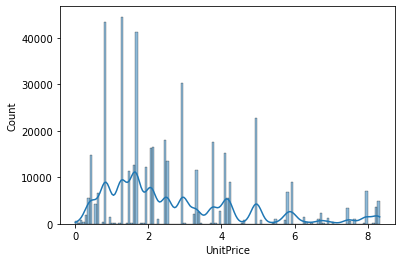

In [38]:
# UnitPrice의 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x = 'UnitPrice', data = df, kde = True)

In [39]:
log_up = np.log1p(df.UnitPrice)

<AxesSubplot:xlabel='UnitPrice', ylabel='Count'>

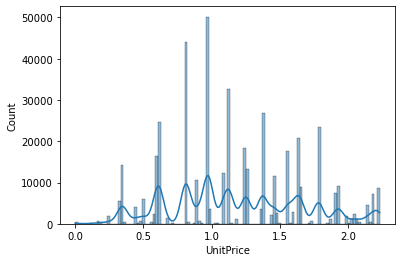

In [40]:
sns.histplot(x = log_up, kde = True)

In [41]:
df['UnitPrice'] = log_up

In [42]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1.266948,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,1.321756,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.615186,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,1.131402,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,1.638997,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,1.638997,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df['StockCode_isalpha'] = df.StockCode.str.isdigit().astype('int')

In [44]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,...,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,StockCode_isalpha
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1.266948,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,1,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,1,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,1.321756,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,1,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,1,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,1.479329,3867,United Kingdom,2010,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.615186,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,1.131402,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,1.638997,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,1.638997,268,France,2011,12,...,0,0,0,0,0,0,0,0,0,1


#### 예측할 Description 고르기

In [45]:
df.Description.value_counts().sort_values().tail(20)

ALARM CLOCK BAKELIKE RED              1027
WOODEN PICTURE FRAME WHITE FINISH     1039
JAM MAKING SET WITH JARS              1046
RECIPE BOX PANTRY YELLOW DESIGN       1070
LUNCH BAG SUKI DESIGN                 1070
LUNCH BAG PINK POLKADOT               1070
HEART OF WICKER SMALL                 1076
ASSORTED COLOUR BIRD ORNAMENT         1093
JUMBO STORAGE BAG SUKI                1115
JUMBO SHOPPER VINTAGE RED PAISLEY     1118
LUNCH BAG CARS BLUE                   1119
JUMBO BAG PINK POLKADOT               1122
SET OF 3 CAKE TINS PANTRY DESIGN      1125
LUNCH BAG SPACEBOY DESIGN             1138
NATURAL SLATE HEART CHALKBOARD        1208
LUNCH BAG  BLACK SKULL.               1267
PARTY BUNTING                         1297
LUNCH BAG RED RETROSPOT               1457
JUMBO BAG RED RETROSPOT               1821
WHITE HANGING HEART T-LIGHT HOLDER    1938
Name: Description, dtype: int64

In [46]:
df.Description.str.contains('LUNCH BAG').sum()

12901

In [47]:
df['y'] = list(map(int, df.Description.str.contains('LUNCH BAG')))

In [48]:
df.Description.str.contains('LUNCH BAG').unique()

array([False,  True])

In [49]:
df.y.value_counts()

0    423742
1     12901
Name: y, dtype: int64

-------------------------------------------------전처리 완료---------------------------------------------------------

### 머신러닝
- Decision Tree
- Random Forest
- Logistic Regression

#### 머신러닝에 사용할 컬럼 분리하기

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436643 entries, 0 to 541908
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             436643 non-null  object        
 1   StockCode             436643 non-null  object        
 2   Description           436643 non-null  object        
 3   Quantity              436643 non-null  int64         
 4   InvoiceDate           436643 non-null  datetime64[ns]
 5   UnitPrice             436643 non-null  float64       
 6   CustomerID            436643 non-null  int64         
 7   Country               436643 non-null  object        
 8   year                  436643 non-null  int64         
 9   month                 436643 non-null  int64         
 10  day                   436643 non-null  int64         
 11  hour                  436643 non-null  int64         
 12  Australia             436643 non-null  uint8         
 13 

In [51]:
mldata = df.select_dtypes(include = [np.number])

In [52]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436643 entries, 0 to 541908
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Quantity              436643 non-null  int64  
 1   UnitPrice             436643 non-null  float64
 2   CustomerID            436643 non-null  int64  
 3   year                  436643 non-null  int64  
 4   month                 436643 non-null  int64  
 5   day                   436643 non-null  int64  
 6   hour                  436643 non-null  int64  
 7   Australia             436643 non-null  uint8  
 8   Austria               436643 non-null  uint8  
 9   Bahrain               436643 non-null  uint8  
 10  Belgium               436643 non-null  uint8  
 11  Brazil                436643 non-null  uint8  
 12  Canada                436643 non-null  uint8  
 13  Channel Islands       436643 non-null  uint8  
 14  Cyprus                436643 non-null  uint8  
 15  

In [53]:
y_df = mldata['y']
X_df = mldata.drop('y', axis = 1)

In [54]:
X_df

,Quantity,UnitPrice,CustomerID,year,month,day,hour,Australia,Austria,Bahrain,...,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,StockCode_isalpha
0,6,1.266948,3867,2010,12,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,1.479329,3867,2010,12,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,8,1.321756,3867,2010,12,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,1.479329,3867,2010,12,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,1.479329,3867,2010,12,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,0.615186,268,2011,12,9,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
541905,6,1.131402,268,2011,12,9,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
541906,4,1.638997,268,2011,12,9,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
541907,4,1.638997,268,2011,12,9,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
y_df

0         0
1         0
2         0
3         0
4         0
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Name: y, Length: 436643, dtype: int64

#### Test & Trainning set 분리

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 123)

#### 머신러닝

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
dt_clf = DecisionTreeClassifier(random_state = 123)
rf_clf = RandomForestClassifier(random_state = 123)
lr_clf = LogisticRegression(solver = 'liblinear')

In [59]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('-'*50)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest Classifier')
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('-'*50)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic Regression')
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Decision Tree Classifier
Accuracy : 0.9846
--------------------------------------------------
Random Forest Classifier
정확도 : 0.9855
--------------------------------------------------
Logistic Regression
정확도 : 0.9708
